<a href="https://colab.research.google.com/github/central209/CS4410/blob/main/cbrokaw_16_04_layerremoved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16.4 &mdash; Dense layer removed

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

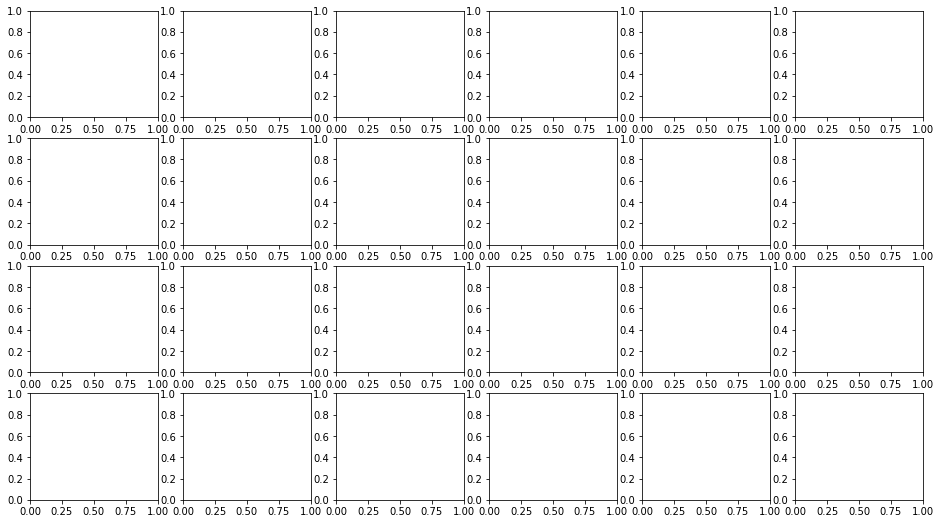

In [11]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

In [12]:
for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [13]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_train = X_train.astype('float32') / 255

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_test = X_test.astype('float32') / 255

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train)

In [21]:
y_train.shape

(60000, 10)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_test = to_categorical(y_test)

In [24]:
y_test.shape

(10000, 10)

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
cnn = Sequential()

In [27]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [28]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [29]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [31]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [32]:
cnn.add(Flatten())

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 10)                3

In [35]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

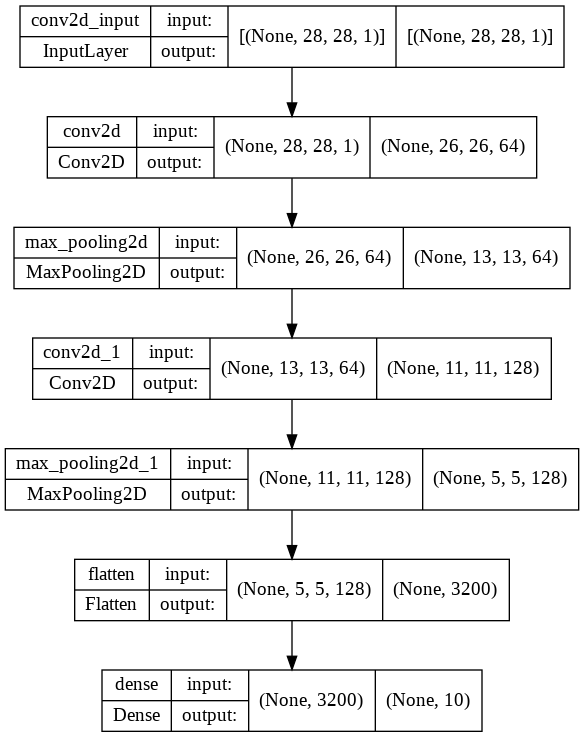

In [36]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [37]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 109s 128ms/step - loss: 0.1694 - accuracy: 0.9490 - val_loss: 0.0519 - val_accuracy: 0.9847
Epoch 2/5
844/844 [==============================] - 110s 131ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0442 - val_accuracy: 0.9873
Epoch 3/5
844/844 [==============================] - 108s 127ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0385 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 107s 127ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 107s 127ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0331 - val_accuracy: 0.9897


In [39]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0324 - accuracy: 0.9896


In [40]:
loss

0.03237416595220566

In [41]:
accuracy

0.9896000027656555

In [42]:
predictions = cnn.predict(X_test)

In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [44]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000183%
1: 0.0000000027%
2: 0.0001194392%
3: 0.0001187605%
4: 0.0000000000%
5: 0.0000003117%
6: 0.0000000000%
7: 99.9997258186%
8: 0.0000006516%
9: 0.0000297996%


In [45]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [46]:
len(incorrect_predictions)

104

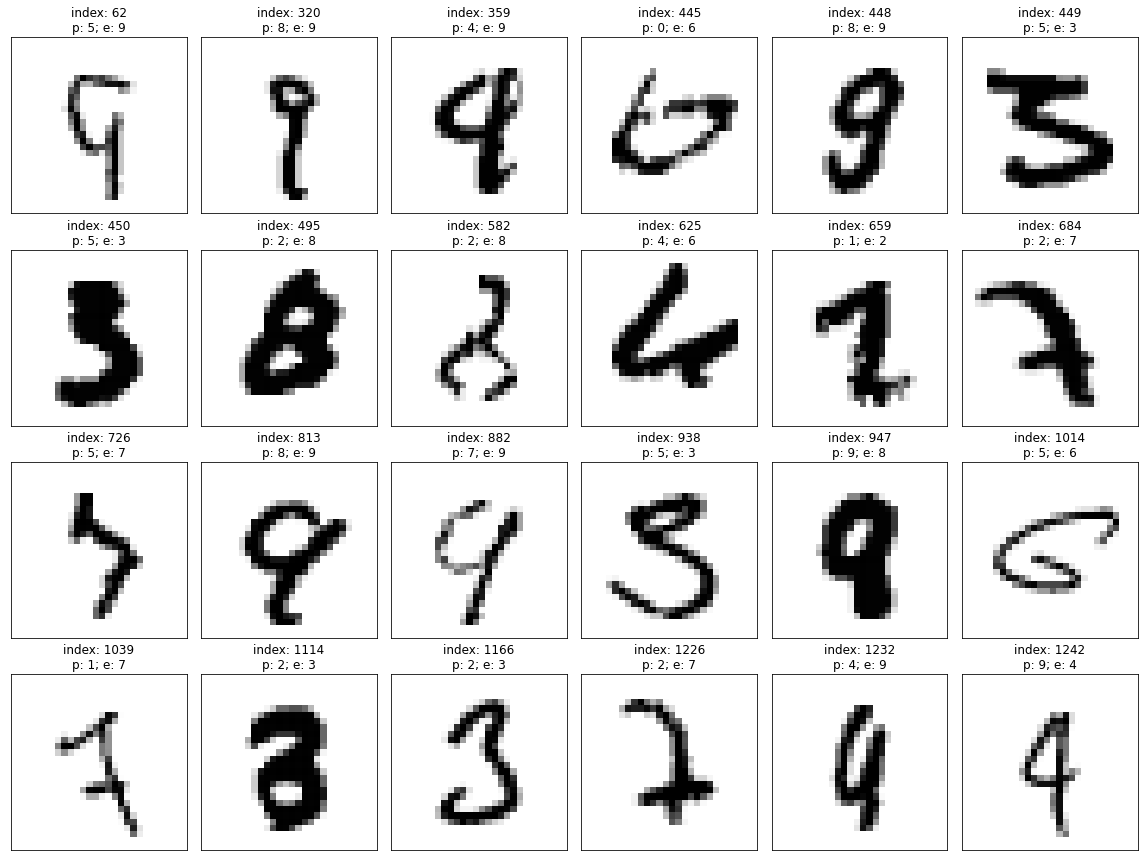

In [47]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()